In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

<IPython.core.display.Javascript object>

In [2]:
df=pd.read_csv('coaster_db.csv')
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2

## Step 1: Data Understanding 
#Dataframe shape
#head and tail
#dtypes
#describe

In [3]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [4]:
df.shape

(1087, 56)

# Step 2: Data Preparation
#Dropping irrelevant columns and rows 
Identifying duplicated columns
#Renaming Columns
#Feature Creation

In [5]:
df=df[['coaster_name', 
#     'Length', 'Speed',
    'Location', 'Status', 
#     'Opening date',
#        'Type', 
    'Manufacturer', 
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date', 'Opened', 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
#     'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
#     'height_value', 
#     'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

In [6]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
#renaming columns
df=df.rename(columns={'coaster_name':'Coaster_Name', 'year_introduced':'Year_Introduced',
       'latitude':'Latitude', 'longitude':'longitude', 'opening_date_clean':'Opening_Date', 'speed_mph':'Speed_mph',
       'height_ft':'Height_ft', 'Inversions_clean':'Inversions', 'Gforce_clean':'Gforce'})


In [8]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Coaster_Name     1087 non-null   object 
 1   Location         1087 non-null   object 
 2   Status           874 non-null    object 
 3   Manufacturer     1028 non-null   object 
 4   Year_Introduced  1087 non-null   int64  
 5   Latitude         812 non-null    float64
 6   longitude        812 non-null    float64
 7   Type_Main        1087 non-null   object 
 8   Opening_Date     837 non-null    object 
 9   Speed_mph        937 non-null    float64
 10  Height_ft        171 non-null    float64
 11  Inversions       1087 non-null   int64  
 12  Gforce           362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


In [10]:
df['Opening_Date']=pd.to_datetime(df['Opening_Date'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_Name     1087 non-null   object        
 1   Location         1087 non-null   object        
 2   Status           874 non-null    object        
 3   Manufacturer     1028 non-null   object        
 4   Year_Introduced  1087 non-null   int64         
 5   Latitude         812 non-null    float64       
 6   longitude        812 non-null    float64       
 7   Type_Main        1087 non-null   object        
 8   Opening_Date     837 non-null    datetime64[ns]
 9   Speed_mph        937 non-null    float64       
 10  Height_ft        171 non-null    float64       
 11  Inversions       1087 non-null   int64         
 12  Gforce           362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 110.5+ KB


In [12]:
#checking for duplicates
df.duplicated(subset=['Coaster_Name']).sum()

97

In [13]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
239,La Vibora,Other,NaN,Intamin,1986,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
241,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1987,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
252,La Vibora,Other,NaN,Intamin,1987,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
262,Flashback (Six Flags Magic Mountain),Other,NaN,Intamin,1988,NaN,NaN,Steel,NaT,35.0,NaN,0,3.0
270,Alpine Bobsled,Other,NaN,Intamin,1989,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN


In [14]:
df=df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])]\
.reset_index(drop=True).copy()


In [15]:
df.shape

(990, 13)

In [16]:
#looking fr null values
df.isnull().sum()

Coaster_Name         0
Location             0
Status             146
Manufacturer        58
Year_Introduced      0
Latitude           207
longitude          207
Type_Main            0
Opening_Date       183
Speed_mph          140
Height_ft          831
Inversions           0
Gforce             666
dtype: int64

# Step 3: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions
Histogram
KDE
Boxplot

<AxesSubplot:title={'center':'Top 10 Coasters Years'}, xlabel='Year_Introduced', ylabel='Count'>

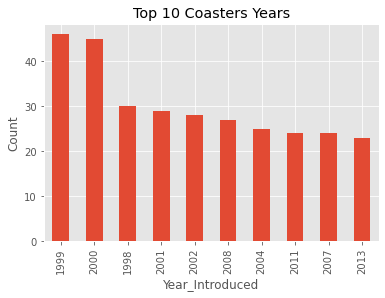

In [17]:
df['Year_Introduced'].value_counts().head(10)\
.plot(kind='bar',xlabel='Year_Introduced',ylabel='Count',title='Top 10 Coasters Years')

Text(0.5, 0, 'Speed (mph)')

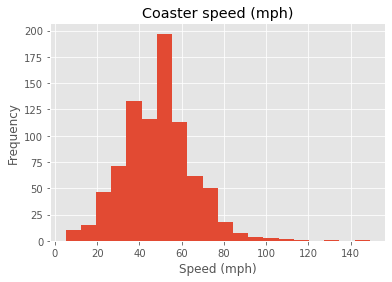

In [18]:
h=df['Speed_mph'].plot(kind='hist',bins=20,title='Coaster speed (mph)')
h.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

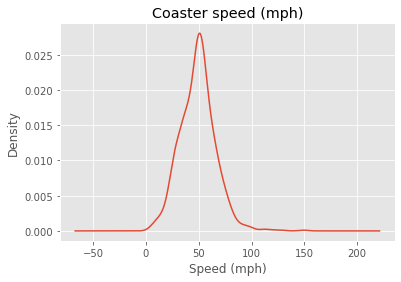

In [19]:
h=df['Speed_mph'].plot(kind='kde',title='Coaster speed (mph)')
h.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Height_ft')

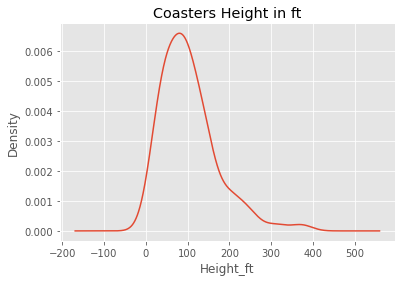

In [20]:
h=df['Height_ft'].plot(kind='kde',title='Coasters Height in ft')
h.set_xlabel('Height_ft')

In [21]:
df['Type_Main'].value_counts()

Steel    728
Wood     191
Other     71
Name: Type_Main, dtype: int64

# Step 4: Feature Relationships
Scatterplot
Heatmap Correlation
Pairplot
Groupby comparisons

<IPython.core.display.Javascript object>

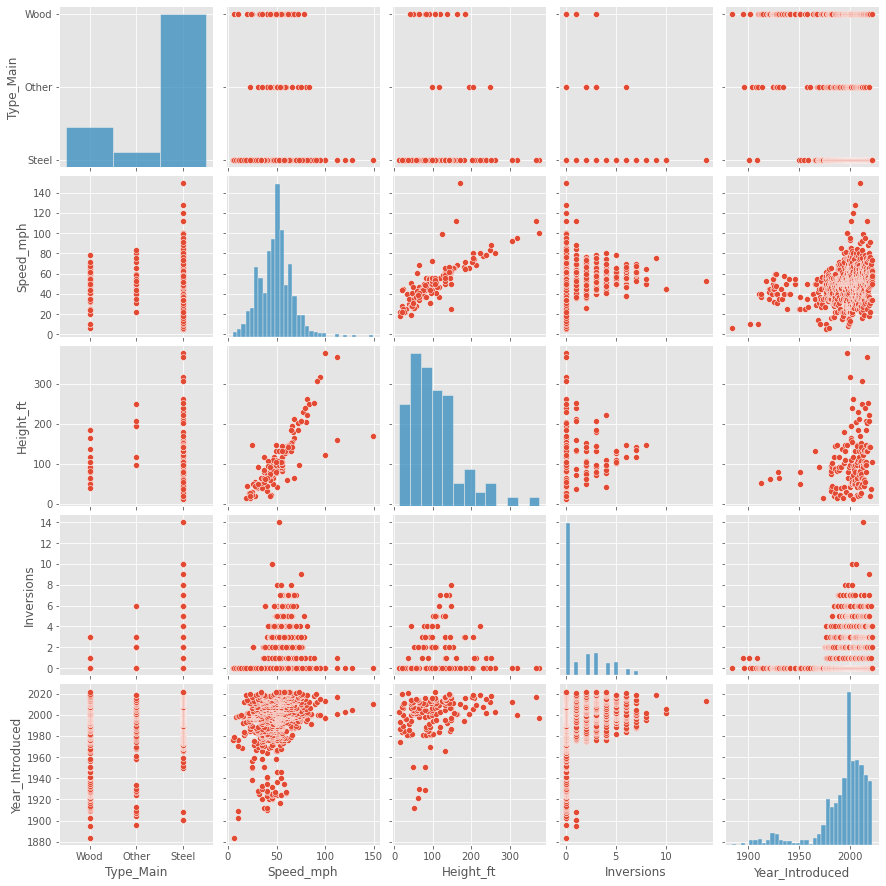

In [22]:
sns.pairplot(df,vars=['Type_Main','Speed_mph','Height_ft','Inversions','Year_Introduced'])
plt.show()

# Step 5: Ask a Question about the data
Try to answer a question you have about the data using a plot or statistic.


# What are the locations with the fastest roller coasters (minimum of 10)?

Text(0.5, 0, 'Average Speed(mph)')

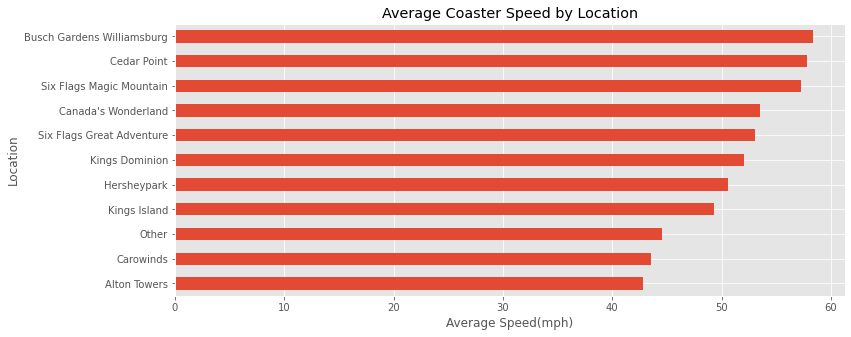

In [23]:
ax=df2=df.groupby(['Location'])['Speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean']\
.plot(kind='barh',figsize=(12,5),title='Average Coaster Speed by Location')
ax.set_xlabel('Average Speed(mph)')

In [24]:

# 2. **Geographical Analysis:**
#    - What are the locations (countries or cities) with the most roller coasters?
#    - Can you visualize the distribution of roller coasters on a map using latitude and longitude?

# 3. **Performance Analysis:**
#    - What is the average speed of roller coasters?
#    - What is the average height of roller coasters?
#    - Are there any correlations between speed, height, and the number of inversions?
#    - Is there a relationship between speed and height based on the type of roller coaster?

# 4. **Manufacturers and Trends:**
#    - Which manufacturer has the most roller coasters in the dataset?
#    - How has the number of roller coasters introduced by each manufacturer changed over the years?
#    - Are there certain manufacturers that tend to produce roller coasters with more inversions or higher speeds?

# 5. **Temporal Analysis:**
#    - How has the number of roller coasters introduced each year changed over time?
#    - Are there any trends in roller coaster types becoming more popular over the years?
#    - Is there a pattern in opening dates of roller coasters (e.g., specific seasons)?

# 6. **Inversions and G-Force:**
#    - What is the distribution of inversions and G-forces among roller coasters?
#    - Do roller coasters with more inversions tend to have higher or lower G-forces?

# 7. **Relationships and Correlations:**
#    - Is there a correlation between speed and height of roller coasters?
#    - Is there any relationship between the number of inversions and G-force?

# 8. **Categorization and Status:**
#    - How does the status of a roller coaster relate to its type, speed, height, etc.?
#    - Are there specific types of roller coasters that are more likely to be closed or under construction?

# 9. **Opening Date Analysis:**
#    - Can you identify any patterns in roller coaster opening dates based on month, day of the week, or year?

# 10. **Interactive Analysis:**
#     - Can you create interactive visualizations to allow users to explore the dataset themselves?

# Remember that the above questions are just starting points. Depending on your domain knowledge and specific goals, you can dive deeper into these aspects or come up with additional questions to gain a comprehensive understanding of your roller coaster dataset through EDA.

SyntaxError: invalid syntax (<ipython-input-24-71f57856e8b1>, line 1)

# How many roller coasters are in the dataset?

In [25]:

df['Coaster_Name'].count()


990

#  - What is the range of years in which roller coasters were introduced?

In [26]:

df['Year_Introduced'].unique()
time_periods = {
    '1850-1900': 0,
    '1901-1950': 0,
    '1951-2000': 0,
    '2001-2050': 0
   
}
for year in df['Year_Introduced']:
    if 1850<=year<=1900:
        time_periods['1850-1900']+=1
    elif 1901<=year<=1950:
        time_periods['1901-1950']+=1
    elif 1951<=year<=2000:
         time_periods['1951-2000']+=1
    elif 2001<=year<=2050:
        time_periods['2001-2050']+=1
print(time_periods)


{'1850-1900': 3, '1901-1950': 65, '1951-2000': 466, '2001-2050': 456}


#    - How many different manufacturers are represented in the dataset?

In [27]:

manufacturers=df['Manufacturer'].value_counts()
manufacturers


Vekoma                                                                                                         122
Bolliger & Mabillard                                                                                           104
Intamin                                                                                                         84
Mack Rides                                                                                                      53
Arrow Dynamics                                                                                                  53
Anton Schwarzkopf                                                                                               45
Gerstlauer                                                                                                      45
Philadelphia Toboggan Coasters                                                                                  32
Custom Coasters International                                                   

#    - What are the different types of roller coasters based on the 'Type_Main' column?

In [28]:

df2=df.groupby(['Type_Main'])['Coaster_Name'].agg('count')
df2


Type_Main
Other     71
Steel    728
Wood     191
Name: Coaster_Name, dtype: int64

#    - What is the distribution of top 5 roller coaster statuses?

In [29]:

status_name=df['Status'].value_counts().index
status_value=df['Status'].value_counts()
status_value


Operating                                                         646
Removed                                                           133
Closed                                                             23
Under construction                                                 14
In Production                                                      11
Discontinued                                                        7
Chapter 7 bankruptcy; rides dismantled and sold; property sold      2
SBNO (Standing But Not Operating)                                   1
closed for maintenance as of july 30 no reopening date known        1
Not Currently Operating                                             1
Temporarily Closed                                                  1
SBNO December 2019                                                  1
Temporarily closed                                                  1
Closed in 2021                                                      1
Under Maintenance   

In [ ]:
plt.pie(status_value[:5],labels=status_name[:5])
plt.show()

#  **Geographical Analysis:**
#    - What are the locations (countries or cities) with the most roller coasters?

In [30]:

df.drop(df.loc[df['Location']=='Other'].index, inplace=True)
location_name=df['Location'].value_counts().index
location_name
location_value=df['Location'].value_counts()
location_value


Kings Island                    19
Cedar Point                     18
Six Flags Magic Mountain        17
Hersheypark                     16
Carowinds                       14
                                ..
Celebration City                 1
Kuwait Entertainment City        1
Fun Spot America (Kissimmee)     1
Granada Studios Tour             1
Walygator Parc                   1
Name: Location, Length: 279, dtype: int64

In [ ]:
plt.pie(location_value[:10],labels=location_name[:10],autopct=" %1.2f%%")
plt.show()

# 3. **Performance Analysis:**
#    - What is the average speed of roller coasters?

Text(0.5, 0, 'Average Speed(mph)')

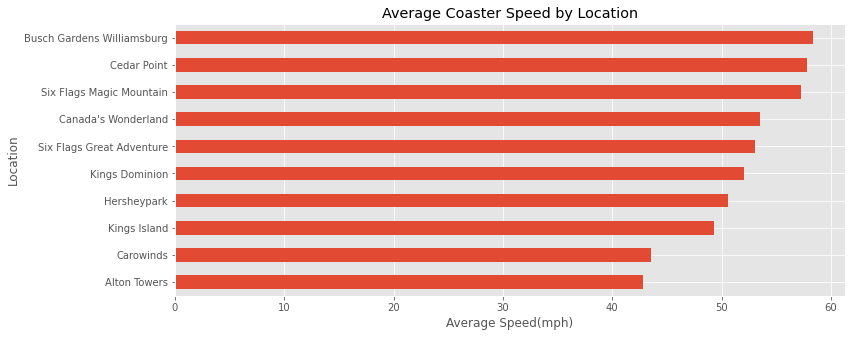

In [31]:


ax=df2=df.groupby(['Location'])['Speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean']\
.plot(kind='barh',figsize=(12,5),title='Average Coaster Speed by Location')
ax.set_xlabel('Average Speed(mph)')

#    - What is the average height of roller coasters?

In [32]:

Average_height=df['Height_ft'].mean()
Average_height


104.058389261745

#    - Are there any correlations between speed, height, and the number of inversions?

<IPython.core.display.Javascript object>

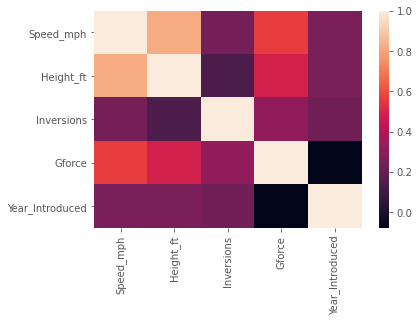

In [36]:

df_corr=df[['Speed_mph','Height_ft','Inversions','Gforce','Year_Introduced']].corr()
df_corr
sns.heatmap(df_corr)
plt.show()


#  Is there a relationship between speed and height based on the type of roller coaster?


<IPython.core.display.Javascript object>

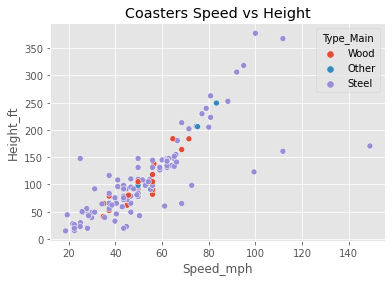

In [37]:

p=sns.scatterplot(x='Speed_mph',y='Height_ft',data=df,hue='Type_Main')
p.set_title('Coasters Speed vs Height')
plt.show()

# 4. **Manufacturers and Trends:**
#    - Which manufacturer has the most roller coasters in the dataset?

In [38]:

e=df['Manufacturer'].value_counts().idxmax()
f=df['Manufacturer'].value_counts().max()
print(f'{e} is the manufacture with {f}')

Bolliger & Mabillard is the manufacture with 93


#    - Are there certain manufacturers that tend to produce roller coasters with more inversions or higher speeds?

In [39]:

stats=df.groupby('Manufacturer').agg({'Inversions':'mean','Speed_mph':
                                 'mean'}).reset_index()


In [40]:
inversions_highest_avg=stats.loc[stats['Inversions'].idxmax()]

Minversion=inversions_highest_avg['Manufacturer']
speed_highest_avg=stats.loc[stats['Speed_mph'].idxmax()]
Mspeed=speed_highest_avg['Manufacturer']

In [41]:
print(f'Manufacturer with highest average inversions is {Minversion}')
print(f'Manufacturer with highest average speed is {Mspeed}')

Manufacturer with highest average inversions is BHS
Manufacturer with highest average speed is Giovanola


# 6. **Inversions and G-Force:**
#    - What is the distribution of inversions and G-forces among roller coasters?

Text(0.5, 0, 'Inversions')

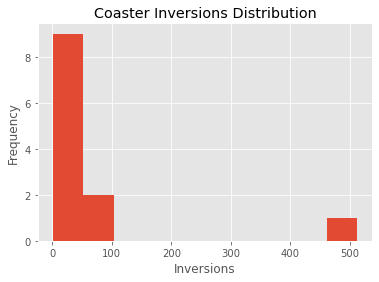

In [42]:

inversionscount=df['Inversions'].value_counts()
h=inversionscount.plot(kind='hist',bins=10,title='Coaster Inversions Distribution')
h.set_xlabel('Inversions')
# inversionscount


Text(0.5, 0, 'Gforce')

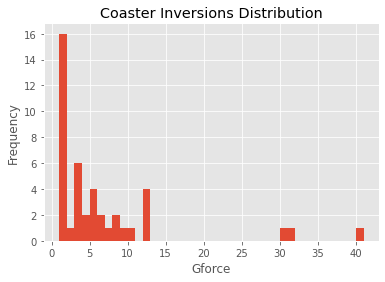

In [43]:
Gforcecount=df['Gforce'].value_counts()
h=Gforcecount.plot(kind='hist',bins=40,title='Coaster Inversions Distribution')
h.set_xlabel('Gforce')


#    - Is there any relationship between the number of inversions and G-force?

<AxesSubplot:xlabel='Inversions', ylabel='Gforce'>

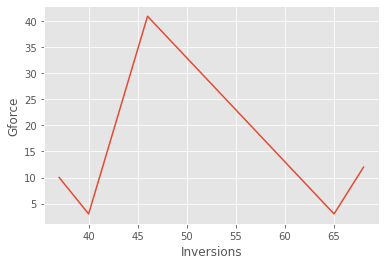

In [44]:
sns.lineplot(x=inversionscount,y=Gforcecount)


# 7. **Categorization and Status:**
#    - How does the status of a roller coaster relate to its type, speed, height, etc.?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

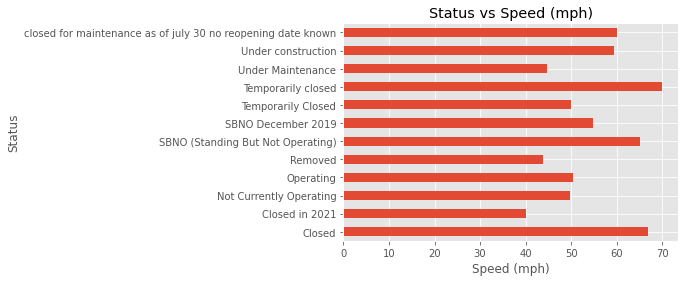

In [45]:

s=df.groupby(['Status'])['Speed_mph'].mean().dropna().plot.barh()
plt.xlabel('Speed (mph)')
plt.title('Status vs Speed (mph)')
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

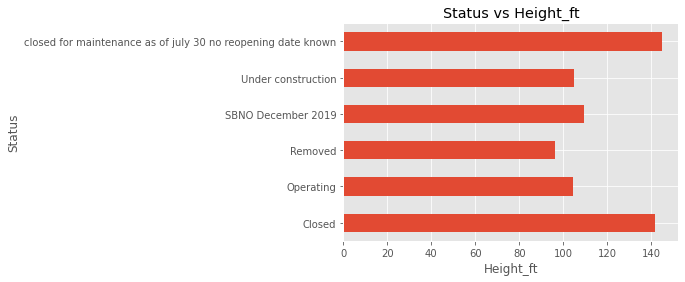

In [46]:
s=df.groupby(['Status'])['Height_ft'].mean().dropna().plot.barh()
plt.xlabel('Height_ft')
plt.title('Status vs Height_ft')
plt.show()

#    - Are there specific types of roller coasters that are more likely to be closed or under construction?

In [47]:

x=df.loc[df.Status=='Closed' ]
y=x.groupby(['Location'])['Coaster_Name'].agg('count')
y


Location
63rd and N.W. Expressway, Oklahoma City, Oklahoma, U.S.    1
Barangay 1, Pasay, Philippines                             1
Blackpool Pleasure Beach                                   1
Cedar Point                                                2
Cleveland, Ohio, United States                             7
Conneaut Lake Park                                         1
Fuji-Q Highland                                            1
Gardaland                                                  1
Kings Dominion                                             1
Lightwater Valley                                          1
Nürburgring                                                1
Primm Valley Resorts                                       1
Six Flags Great Adventure                                  1
Six Flags New Orleans                                      2
Xishuangbanna Theme Park                                   1
Name: Coaster_Name, dtype: int64

In [48]:
r=df.loc[df.Status=='Under construction' ]
underconstructionrollers=r.groupby(['Location'])['Coaster_Name'].agg('count')
underconstructionrollers

Location
Busch Gardens Tampa Bay            1
Busch Gardens Williamsburg         1
Dreamworld                         1
Epcot                              1
Fun Spot America Atlanta           1
Fårup Sommerland                   1
Glenwood Caverns Adventure Park    1
Kings Dominion                     1
Sea World                          1
SeaWorld Orlando                   1
SeaWorld San Diego                 1
Six Flags Fiesta Texas             1
Six Flags Magic Mountain           1
Six Flags Over Texas               1
Name: Coaster_Name, dtype: int64

# 9. **Opening Date Analysis:**
#    - Can you identify any patterns in roller coaster opening dates based on month, day of the week, or year?

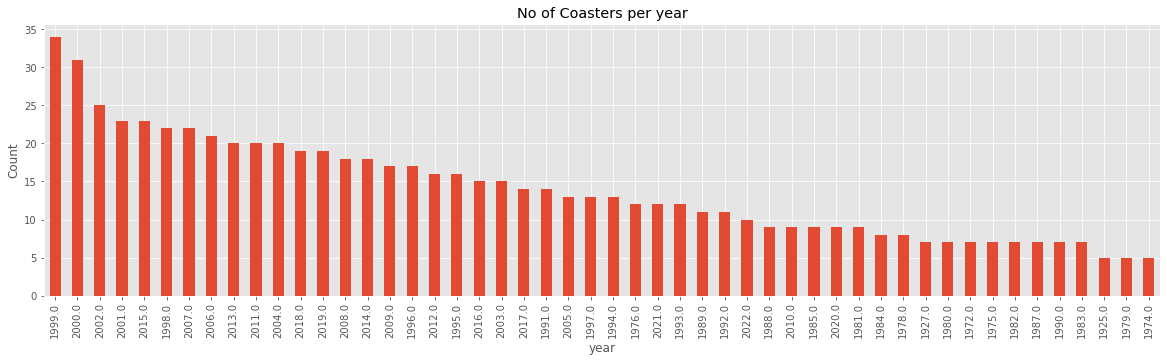

In [49]:

df['year'] = df['Opening_Date'].dt.year
g=df.groupby(['year']).size().sort_values(ascending=False)
mostopening=g.head(50).plot(kind='bar',figsize=(20,5),ylabel='Count',title='No of Coasters per year')
# df['year']
# g

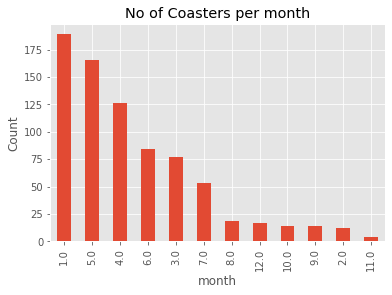

In [50]:
df['month'] = df['Opening_Date'].dt.month.dropna()
# df['month'].dropna() 
month=df.groupby(['month']).size().sort_values(ascending=False)
monthopenings=month.plot(kind='bar',ylabel='Count',title='No of Coasters per month')